# IMPORTING LIBRARIES

In [75]:
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Input,Dense
import numpy as np

# LOADING THE DATA

In [76]:
with np.load(r'/content/drive/MyDrive/Data/mnist_features.npz') as f:
    X_train = f['x_train']
    y_train = f['y_train']
    X_test = f['x_test']
    y_test = f['y_test']

In [77]:
X_train.shape

(60000, 28, 28)

In [78]:
X_test.shape

(10000, 28, 28)

# NORMALIZING THE PIXEL VALUES

In [79]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flattening the images into 1-D arrays

In [80]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

# BUILDING THE AUTO-ENCODER MODEL

In [81]:
input_img = Input(shape=(784,))

encoded = Dense(units=32,activation='relu')(input_img)
decoded = Dense(units=784,activation='sigmoid')(encoded)

encoded_model = Model(input_img,encoded)
decoded_model = Model(encoded,decoded)

autoencoder = Sequential()

autoencoder.add(encoded_model)
autoencoder.add(decoded_model)

## COMPILING THE Auto-Encoder Model

In [82]:
autoencoder.compile(loss='mean_squared_error',optimizer='adam')

## TRAINING THE AUTO-ENCODER MODEL

In [83]:
history = autoencoder.fit(X_train,X_train, epochs=10, validation_data=(X_test,X_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0320 - val_loss: 0.0161
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0134 - val_loss: 0.0113
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0112 - val_loss: 0.0104
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0105 - val_loss: 0.0101
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0103 - val_loss: 0.0100
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.010

# VISUALIZATION

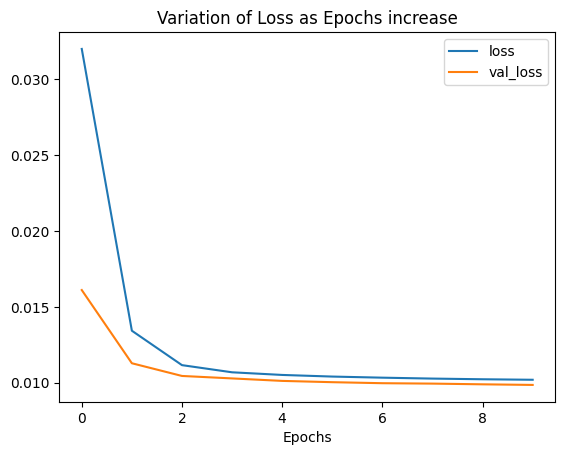

In [84]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.xlabel("Epochs")
plt.title("Variation of Loss as Epochs increase")
plt.show()

In [85]:
encoded_img = encoded_model.predict(X_test)
decoded_img = decoded_model.predict(encoded_img)

313/313 [==============================] - 1s 2ms/step


Original Image


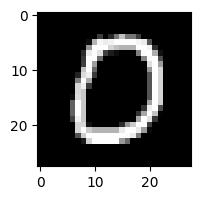

In [86]:
print("Original Image")
plt.figure(figsize=(2,2))
plt.imshow(X_test[10].reshape(28,28))
plt.gray()
plt.show()

Encoded Image


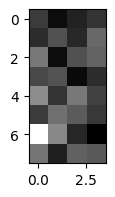

In [87]:
print("Encoded Image")
plt.figure(figsize=(2,2))
plt.imshow(encoded_img[10].reshape(8,4))
plt.gray()
plt.show()

Decoded Image


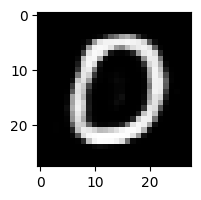

In [88]:
print("Decoded Image")
plt.figure(figsize=(2,2))
plt.imshow(decoded_img[10].reshape(28,28))
plt.gray()
plt.show()